## Zillow House Price Prediction Model ##

**import necessary libraries**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

**Load the Ames Housing dataset**

In [71]:
data = r"C:\Users\ssing\OneDrive\Desktop\AmesHousing.csv"
data = pd.read_csv(data)

**Explore the dataset**

In [74]:
# Explore the dataset
print("Dataset Information:")
data.info()
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object

**Handle Missing Values**

*Numerical columns: Fill with mean*

In [161]:
#Numerical columns: Fill with mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)

*Categorical columns: Fill with mode*

In [163]:
# Categorical columns: Fill with mode
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

*Verify no missing values remain*

In [84]:
# Verify no missing values remain
print("\nMissing Values After Imputation:")
print(data.isnull().sum().sum())


Missing Values After Imputation:
0


**Remove duplicates**

In [168]:
data = data.drop_duplicates()
print(f"Number of rows after removing duplicates: {data.shape[0]}")

Number of rows after removing duplicates: 2930


**Convert categorical variables to numerical**

In [94]:
data = pd.get_dummies(data, drop_first=True)

**Define features and target**

In [97]:
print(data.columns)

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area',
       ...
       'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD',
       'Sale Type_WD ', 'Sale Condition_AdjLand', 'Sale Condition_Alloca',
       'Sale Condition_Family', 'Sale Condition_Normal',
       'Sale Condition_Partial'],
      dtype='object', length=263)


In [170]:
# Define features and target
X = data[['Lot Area']]  # Example: Selecting a single feature
y = data['SalePrice']

*Dropping less relevant columns*

In [45]:
# Dropping less relevant columns (if needed based on domain knowledge)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

**Split data into training and testing sets**

In [172]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build and train the linear regression model**

In [174]:
# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Make predictions on the set**

In [176]:
predictions = model.predict(X_test)

**Evaluate The model**

In [178]:
print("\nModel Performance:")
print("MAE:", mean_absolute_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("R-squared:", r2_score(y_test, predictions))


Model Performance:
MAE: 62056.86000101161
MSE: 7509189795.222837
R-squared: 0.06340568713349304


**Visualize the results**

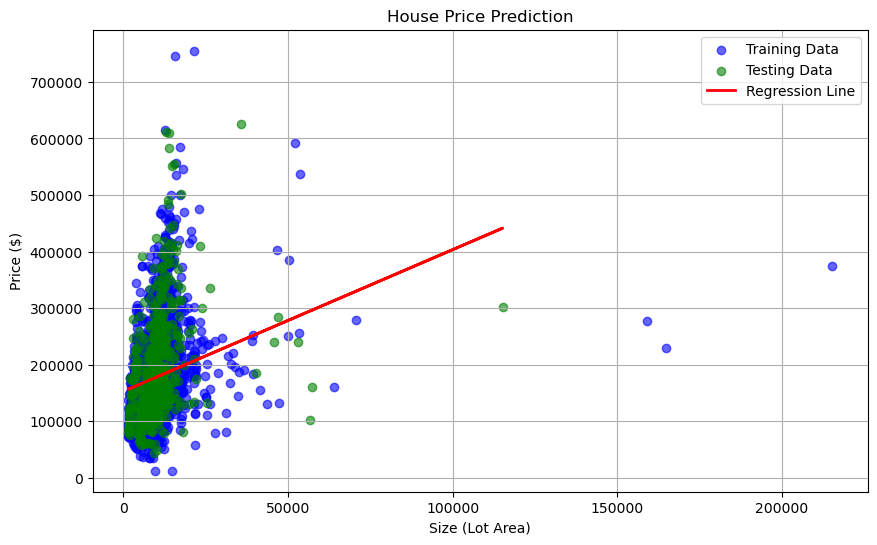

In [180]:
 Visualize the results
plt.figure(figsize=(10, 6))
# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.6)
# Plot testing data
plt.scatter(X_test, y_test, color='green', label='Testing Data', alpha=0.6)
# Plot regression line
plt.plot(X_test, predictions, color='red', linewidth=2, label='Regression Line')
plt.title('House Price Prediction')
plt.xlabel('Size (Lot Area)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()